# Netflix Price

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/MyDrive


## Data Overview

<p> Get the data from : https://www.kaggle.com/netflix-inc/netflix-prize-data/data </p>
<p> Data files : 
<ul> 
<li> combined_data_1.txt </li>
<li> combined_data_2.txt </li>
<li> combined_data_3.txt </li>
<li> combined_data_4.txt </li>
<li> movie_titles.csv </li>
</ul>
<pre>  
The first line of each file [combined_data_1.txt, combined_data_2.txt, combined_data_3.txt, combined_data_4.txt] contains the movie id followed by a colon. Each subsequent line in the file corresponds to a rating from a customer and its date in the following format:

CustomerID,Rating,Date

MovieIDs range from 1 to 17770 sequentially.
CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
Ratings are on a five star (integral) scale from 1 to 5.
Dates have the format YYYY-MM-DD.
</pre>

<pre>
1:
1488844,3,2005-09-06
822109,5,2005-05-13
885013,4,2005-10-19
30878,4,2005-12-26
823519,3,2004-05-03
893988,3,2005-11-17
124105,4,2004-08-05
1248029,3,2004-04-22
1842128,4,2004-05-09
2238063,3,2005-05-11
1503895,4,2005-05-19
2207774,5,2005-06-06
2590061,3,2004-08-12
2442,3,2004-04-14
543865,4,2004-05-28
1209119,4,2004-03-23
804919,4,2004-06-10
1086807,3,2004-12-28
1711859,4,2005-05-08
372233,5,2005-11-23
1080361,3,2005-03-28
1245640,3,2005-12-19
558634,4,2004-12-14
2165002,4,2004-04-06
1181550,3,2004-02-01
1227322,4,2004-02-06
427928,4,2004-02-26
814701,5,2005-09-29
808731,4,2005-10-31
662870,5,2005-08-24
337541,5,2005-03-23
786312,3,2004-11-16
1133214,4,2004-03-07
1537427,4,2004-03-29
1209954,5,2005-05-09
2381599,3,2005-09-12
525356,2,2004-07-11
1910569,4,2004-04-12
2263586,4,2004-08-20
2421815,2,2004-02-26
1009622,1,2005-01-19
1481961,2,2005-05-24
401047,4,2005-06-03
2179073,3,2004-08-29
1434636,3,2004-05-01
93986,5,2005-10-06
1308744,5,2005-10-29
2647871,4,2005-12-30
1905581,5,2005-08-16
2508819,3,2004-05-18
1578279,1,2005-05-19
1159695,4,2005-02-15
2588432,3,2005-03-31
2423091,3,2005-09-12
470232,4,2004-04-08
2148699,2,2004-06-05
1342007,3,2004-07-16
466135,4,2004-07-13
2472440,3,2005-08-13
1283744,3,2004-04-17
1927580,4,2004-11-08
716874,5,2005-05-06
4326,4,2005-10-29
</pre>

## 1. Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import os
from scipy import sparse
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Reading Data

In [ ]:
PATH = '/content/MyDrive/My Drive/Netflix_price'
files = [f for f in os.listdir(PATH) if f.endswith('.txt')]
print(files)

['Copy of combined_data_1.txt', 'Copy of combined_data_2.txt', 'Copy of combined_data_3.txt', 'Copy of combined_data_4.txt']


In [ ]:
from tqdm import tqdm
start_time = datetime.now()
data = open('data.csv', 'w')
for file in tqdm(files):
  with open(os.path.join(PATH, file), 'r') as f:
      for line in f:
          line = line.strip()
          if line.endswith(':'):
              # All below are ratings for this movie, until another movie appears.
              movie_id = line.replace(':', '')
          else:
              line = line.split(',')       #split up '2472440,3,2005-08-13' to ['2472440', '3', '2005-08-13']
              line.insert(0, str(movie_id))    # insert movie_id at the 0th position, so ['2472440', '3', '2005-08-13'] to [1, '2472440', '3', '2005-08-13']
              data.write(','.join(line))   # join with ',' so [1, '2472440', '3', '2005-08-13'] to "1,2472440,3,2005-08-13"
              data.write('\n')

data.close()
print('Time taken to read all 4 files:',datetime.now()-start_time)

100%|██████████| 4/4 [02:23<00:00, 35.87s/it]

Time taken to read all 4 files: 0:02:23.481194


### 2.1 reading that csv

In [ ]:
pd.read_csv('/content/MyDrive/My Drive/Netflix_price/Copy of data.csv').head()

,1,1488844,3,2005-09-06
0,1,822109,5,2005-05-13
1,1,885013,4,2005-10-19
2,1,30878,4,2005-12-26
3,1,823519,3,2004-05-03
4,1,893988,3,2005-11-17


In [ ]:
#put the names of the columns in dataframe
df = pd.read_csv('/content/MyDrive/My Drive/Netflix_price/Copy of data.csv', sep=',', names=['movie', 'user', 'rating', 'date'])

#change the date format to the dates
df['date'] = pd.to_datetime(df['date'])

#sort as per the dates
df.sort_values(by='date', inplace=True)

In [ ]:
df.head()

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11


In [ ]:
df.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

### 2.2 Checking for NaN values

In [ ]:
df.isnull().sum()

movie     0
user      0
rating    0
date      0
dtype: int64

### 2.3 Removing duplicates

In [ ]:
df_dup = df.duplicated(['movie','user', 'rating'])
df_dup

56431994    False
9056171     False
58698779    False
48101611    False
81893208    False
            ...  
49939086    False
42072268    False
47098649    False
55621336    False
25464092    False
Length: 100480507, dtype: bool

In [ ]:
sum(df_dup)

0

### 2.4 Unique datas

In [ ]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user)))
print("Total No of movies  :", len(np.unique(df.movie)))

Total data 
--------------------------------------------------

Total no of ratings : 100480507
Total No of Users   : 480189
Total No of movies  : 17770


## 3. Split data (80-20) on the basis of time(date)
- since we sort the date then take first 80%nof total data as training and 20% as test

In [ ]:
df_train = df.iloc[0:int(df.shape[0]*0.80)]  #taking first 80% as training data
df_test = df.iloc[int(df.shape[0]*0.80):]

In [ ]:
df_train = pd.read_csv('/content/MyDrive/My Drive/Netflix_price/Copy of train.csv', parse_dates=['date'])
df_train.head()

,movie,user,rating,date
0,10341,510180,4,1999-11-11
1,1798,510180,5,1999-11-11
2,10774,510180,3,1999-11-11
3,8651,510180,2,1999-11-11
4,14660,510180,2,1999-11-11


In [ ]:
df_test = pd.read_csv('/content/MyDrive/My Drive/Netflix_price/Copy of test.csv')

,Text
0,Just opened Greenies Joint Care (individually ...
1,This product rocks :) My mom was very happy w/...
2,"The product was fine, but the cost of shipping..."
3,I love this soup. It's great as part of a meal...
4,Getting ready to order again. These are great ...


### 3.1 Basic stat in training data

In [ ]:
len(np.unique(df_train['user']))

405041

In [ ]:
print('No of data points in training data:', df_train.shape[0])
print('No of unique users in training data:', len(np.unique(df_train['user'])))
print('No of unique movies in training data:', len(np.unique(df_train['movie'])))

No of data points in training data: 80384405
No of unique users in training data: 405041
No of unique movies in training data: 17424


### 3.2 Basic stat in test data

In [ ]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user)))
print("Total No of movies  :", len(np.unique(test_df.movie)))

Test data 
--------------------------------------------------

Total no of ratings : 20096102
Total No of Users   : 349312
Total No of movies  : 17757


## 4.EDA
- 4.1 Distribution of rating
- 4.2 Number of ratings per month
- 4.3 Analysis on user
- 4.4 Analysis on movies
- 4.5 Adding the day of the week to the data

### 4.1 Distribution of ratings

In [ ]:
#methods to make y axis readable
def human_y(num, units):
  units = units.lower()
  if units == 'k':
      return str(num/10**3) + 'K'
  if units == 'm':
      return str(num/10**6) + 'M'
  if units == 'b':
      return str(num/10**9) + 'B'

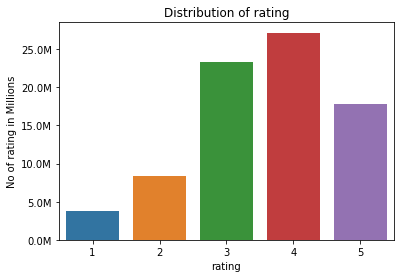

In [ ]:
fig, ax = plt.subplots()
sns.countplot(df_train['rating'])
ax.set_yticklabels([human_y(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No of rating in Millions')
plt.title('Distribution of rating')
plt.show()

### 4.2 Number of rating per month

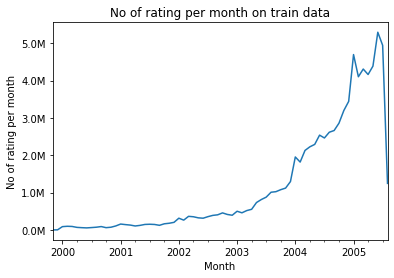

In [ ]:
#group timeseries based data using df.resample(time_based_index)
ax = df_train.resample('m', on='date')['rating'].count().plot()
ax.set_title('No of rating per month on train data')
plt.xlabel('Month')
plt.ylabel("No of rating per month")
ax.set_yticklabels([human_y(item, 'm') for item in ax.get_yticks()])
plt.show()

### 4.3 Analysis on rating given by user

In [ ]:
no_of_rated_movies_per_user = df_train.groupby(by='user')['rating'].count().sort_values(ascending=False)
no_of_rated_movies_per_user.head()

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64

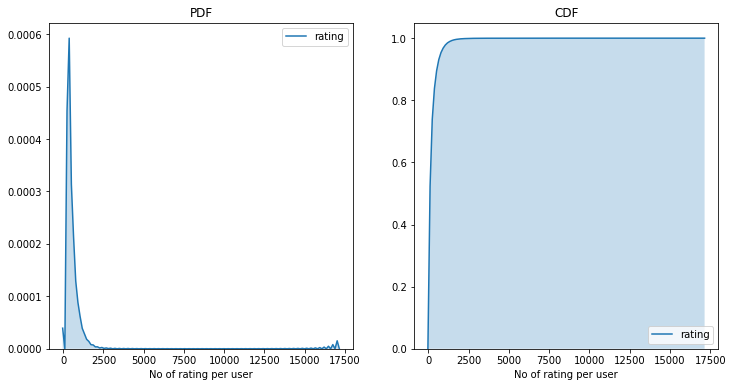

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of rating per user')
plt.title('PDF')

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True, ax=ax2)
plt.xlabel('No of rating per user')
plt.title('CDF')
plt.show()

In [ ]:
no_of_rated_movies_per_user.describe()

count    405041.000000
mean        198.459921
std         290.793238
min           1.000000
25%          34.000000
50%          89.000000
75%         245.000000
max       17112.000000
Name: rating, dtype: float64

#### 4.3.1 Quantiles

In [ ]:
for i in range(0,101,10):
  print(f'{i}th percentile of no of movie rated per user:',np.percentile(no_of_rated_movies_per_user, i))

0th percentile of no of movie rated per user: 1.0
10th percentile of no of movie rated per user: 15.0
20th percentile of no of movie rated per user: 27.0
30th percentile of no of movie rated per user: 41.0
40th percentile of no of movie rated per user: 60.0
50th percentile of no of movie rated per user: 89.0
60th percentile of no of movie rated per user: 133.0
70th percentile of no of movie rated per user: 199.0
80th percentile of no of movie rated per user: 307.0
90th percentile of no of movie rated per user: 520.0
100th percentile of no of movie rated per user: 17112.0


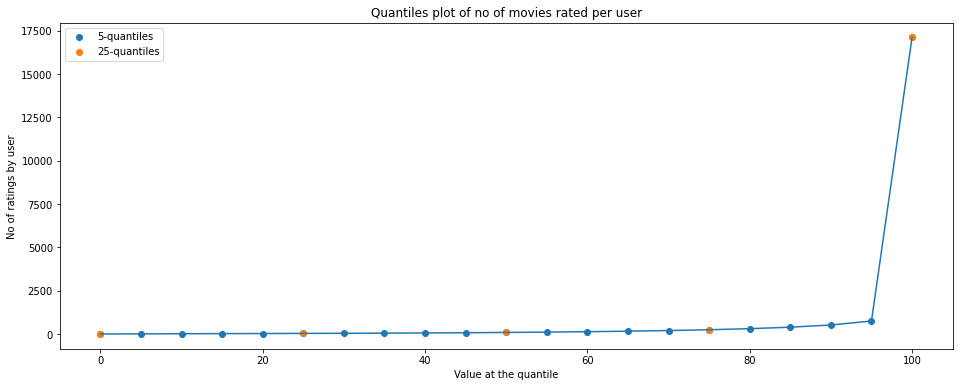

In [ ]:
plt.figure(figsize=(16, 6))

#5-quantiles
plt.scatter([i for i in range(0,101,5)], [np.percentile(no_of_rated_movies_per_user, i) for i in range(0,101,5)], label='5-quantiles')
#10-quantiles
plt.scatter([i for i in range(0,101,25)], [np.percentile(no_of_rated_movies_per_user, i) for i in range(0,101,25)], label='25-quantiles')
plt.plot([i for i in range(0,101,5)], [np.percentile(no_of_rated_movies_per_user, i) for i in range(0,101,5)])
plt.title('Quantiles plot of no of movies rated per user')
plt.legend()
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.show()

#### How many movies rated by last 5% of users? 

In [ ]:
for i in range(0,101,5):
  print(f'{i}th percentile of no of movie rated per user:',np.percentile(no_of_rated_movies_per_user, i))

0th percentile of no of movie rated per user: 1.0
5th percentile of no of movie rated per user: 7.0
10th percentile of no of movie rated per user: 15.0
15th percentile of no of movie rated per user: 21.0
20th percentile of no of movie rated per user: 27.0
25th percentile of no of movie rated per user: 34.0
30th percentile of no of movie rated per user: 41.0
35th percentile of no of movie rated per user: 50.0
40th percentile of no of movie rated per user: 60.0
45th percentile of no of movie rated per user: 73.0
50th percentile of no of movie rated per user: 89.0
55th percentile of no of movie rated per user: 109.0
60th percentile of no of movie rated per user: 133.0
65th percentile of no of movie rated per user: 163.0
70th percentile of no of movie rated per user: 199.0
75th percentile of no of movie rated per user: 245.0
80th percentile of no of movie rated per user: 307.0
85th percentile of no of movie rated per user: 392.0
90th percentile of no of movie rated per user: 520.0
95th per

In [ ]:
print('No of rating at last 5 percentile:',sum(no_of_rated_movies_per_user>=749))

No of rating at last 5 percentile: 20305


### 4.4 Analysis on movies

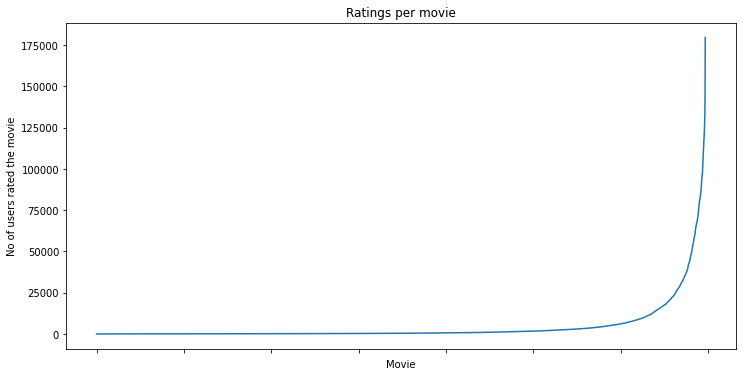

In [ ]:
no_of_ratings_per_movie = df_train.groupby(by='movie')['rating'].count().sort_values(ascending=True)

fig = plt.figure(figsize=(12,6))
ax = plt.gca()  #getting the current axis, becoz our current axis before was plt.subplot(122) which we plot before
plt.plot(no_of_ratings_per_movie.values)
plt.title('Ratings per movie')
plt.xlabel('Movie')
plt.ylabel('No of users rated the movie')
ax.set_xticklabels([])

plt.show()

### 4.5 Add a new column to the data as a day of the week

In [ ]:
#https://stackoverflow.com/questions/60214194/error-in-reading-stock-data-datetimeproperties-object-has-no-attribute-week
df_train['day_of_week'] = df_train['date'].dt.day_name()
df_train.head()

,movie,user,rating,date,day_of_week
0,10341,510180,4,1999-11-11,Thursday
1,1798,510180,5,1999-11-11,Thursday
2,10774,510180,3,1999-11-11,Thursday
3,8651,510180,2,1999-11-11,Thursday
4,14660,510180,2,1999-11-11,Thursday


#### 4.5.1 Number of rating on each day of the week

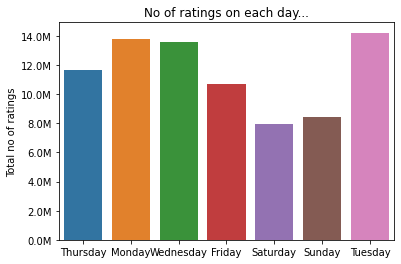

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=df_train, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human_y(item, 'M') for item in ax.get_yticks()])
plt.show()

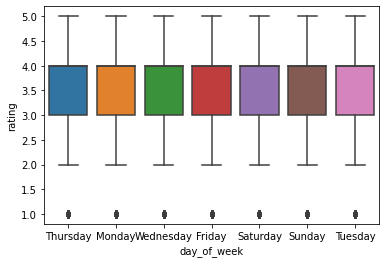

In [ ]:
sns.boxplot(y='rating', x='day_of_week',data=df_train)
plt.show()

In [ ]:
#Average rating per each day
avg_rating_per_day = df_train.groupby(by=['day_of_week'])['rating'].mean()
print('Avearge rating per day')
print('-'*20)
print(avg_rating_per_day)

Avearge rating per day
--------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64


## 5. Creating a sparse matrix from dataframe

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
#csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
#ratings is the one which needs to be filled ---> so it should be the data
#row_ind --> users
#col_ind --> movie_id
train_sparse_matrix = sparse.csr_matrix((df_train['rating'].values, (df_train['users'].values, df_train['movies'].values)),)
sparse.save_npz('Train_sparse_matrix.npz', train_sparse_matrix)

In [ ]:
test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user.values,test_df.movie.values)))
sparse.save_npz('Test_sparse_matrix.npz', test_sparse_matrix)

In [ ]:
train_sparse_matrix = sparse.load_npz('/content/MyDrive/My Drive/Netflix_price/Copy of train_sparse_matrix.npz')
train_sparse_matrix.shape

(2649430, 17771)

In [ ]:
test_sparse_matrix = sparse.load_npz('/content/MyDrive/My Drive/Netflix_price/Copy of test_sparse_matrix.npz')
test_sparse_matrix.shape

(2649430, 17771)

### 5.1 The sparsity of train matrix
-  No of non_zero entries/total_entries

In [ ]:
num_users, num_movies = train_sparse_matrix.shape

total_entries = num_users*num_movies
non_zero_entries = train_sparse_matrix.count_nonzero()
print('Sparsity of training matrix:', (1- (non_zero_entries/total_entries))*100)

Sparsity of training matrix: 99.8292709259195


### 5.2 The sparsity of test matrix

In [ ]:
num_users, num_movies = test_sparse_matrix.shape

total_entries = num_users*num_movies
non_zero_entries = test_sparse_matrix.count_nonzero()
print('Sparsity of training matrix:', (1- (non_zero_entries/total_entries))*100)

Sparsity of training matrix: 99.95731772988694


### 5.3 Global Average of all movie ratings, average rating per user and average rating per movie

In [ ]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)
def get_average_ratings(sparse_matrix, of_users):

    #avg rating of user
    ax = 1 if of_users else 0      # axis 1 - for user, axis 0 - movie

    #".A1" is used for converting column matrix to 1-D numpy array
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1

    #Boolean matrix (whether user rated or not)
    is_rated = sparse_matrix!=0

    #no of ratings that each user OR movie
    no_of_ratings = is_rated.sum(axis=ax).A1

    #max_user, max_movie ids in sparse_matrix
    u,m = sparse_matrix.shape

    #create a dictionary with key:user and values:avg_rating
    average_rating = {i: sum_of_ratings[i]/no_of_ratings[i] for i in range(u if of_users else m) if no_of_ratings[i]!=0}

    return average_rating

#### 5.3.1 finding global average of all movie ratings

In [ ]:
train_averages = dict()
# get the global average of ratings in our train set.
train_gloabal_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_gloabal_average
print(train_averages)

{'global': 3.582890686321557}


#### 5.3.2 finding average rating per user

In [ ]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('Average rating of user 10:',train_averages['user'][10])

Average rating of user 10: 3.3781094527363185


#### 5.3.3 finding average rating per movie

In [ ]:
train_averages['movie'] = get_average_ratings(train_sparse_matrix, of_users = False)
print('Average rating of movie 15:', train_averages['movie'][15])

Average rating of movie 15: 3.3038461538461537


#### 5.3.4 PDF & CDF of Avg Ratings of User & Movies(in train data)

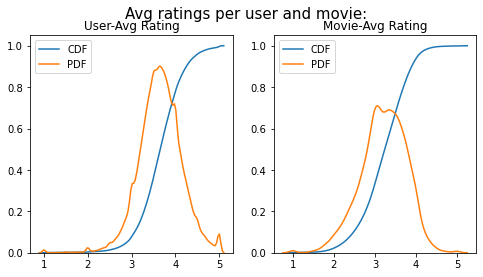

In [ ]:
#draw pdfs for avg rating per user and movie
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.5))
fig.suptitle('Avg ratings per user and movie:', fontsize=15)

ax1.set_title('User-Avg Rating')
user_avg = [rat for rat in train_averages['user'].values()]
sns.distplot(user_avg, ax=ax1, hist=False, kde_kws=dict(cumulative=True), label='CDF')
sns.distplot(user_avg, ax=ax1, hist=False, label='PDF')

ax2.set_title('Movie-Avg Rating')
movie_avg = [rat for rat in train_averages['movie'].values()]
sns.distplot(movie_avg, ax=ax2, hist=False, kde_kws=dict(cumulative=True), label='CDF')
sns.distplot(movie_avg, ax=ax2, hist=False, label='PDF')

plt.show()

#### 5.3.5 Cold Start problem
1. cold start probelm with Users
2. cold start probelm with Movies

In [ ]:
total_users = len(np.unique(df.user))
users_train = len(train_averages['user'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn't appear in train data: {}({} %) \n ".format(new_users,
                                                                        np.round((new_users/total_users)*100, 2)))


Total number of Users  : 480189

Number of Users in Train data : 405041

No of Users that didn't appear in train data: 75148(15.65 %) 
 


### Note:
- We have to deal with 75148 new users which not appear in training data

In [ ]:
total_movies = len(np.unique(df.movie))
movies_train = len(train_averages['movie'])
new_movies = total_movies - movies_train

print('\nTotal number of Movies  :', total_movies)
print('\nNumber of Users in Train data :', movies_train)
print("\nNo of Movies that didn't appear in train data: {}({} %) \n ".format(new_movies,
                                                                        np.round((new_movies/total_movies)*100, 2)))


Total number of Movies  : 17770

Number of Users in Train data : 17424

No of Movies that didn't appear in train data: 346(1.95 %) 
 


### Note:
- We have to deal with 346 movies which not appear in training data

## 6. Computing Similarity Matrix

### 6.1 User- User Similarity
1. Calculating User User Similarity_Matrix is __not very easy__(_unless you have huge Computing Power and lots of time_) because of number of. usersbeing lare.

    * You can try if you want to. Your system could crash or the program stops with **Memory Error**

#### 6.1.1 Trying with all (17k) dimensions

In [ ]:
from sklearn.pairwise import cosine_similarity

#get user indices where the row have nonzero values 
#from this index get cosine_similarity between each users

def compute_user_similarity(sparse_matrix, compute_for_few, top, verbose, verb_for_nrows):
    no_users, _ = sparse_matrix.shape

    #get the indices of users where no zero in rows
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = [] #  time taken for finding similar users for an user..

    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = [], [], []
    if verbose: print("Computing top",top,"similarities for each user..")


    temp =0
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp += 1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]

        #add them to out row, col, data lists
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now() - prev.timestamp())
        if verbose:
            if temp%verb_for_nrows == 0:
                pprint("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
                
         # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, datael = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken  

Computing top 100 similarities for each user..
computing done for 20 users [  time elapsed : 0:03:20.300488  ]
computing done for 40 users [  time elapsed : 0:06:38.518391  ]
computing done for 60 users [  time elapsed : 0:09:53.143126  ]
computing done for 80 users [  time elapsed : 0:13:10.080447  ]
computing done for 100 users [  time elapsed : 0:16:24.711032  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


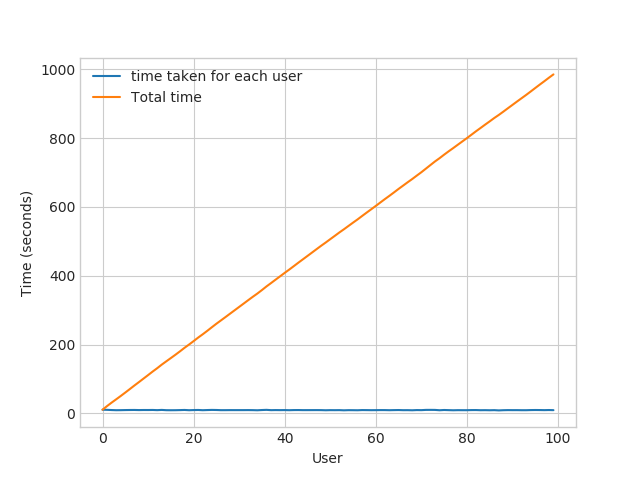

----------------------------------------------------------------------------------------------------
Time taken : 0:16:33.618931


In [ ]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(train_sparse_matrix, compute_for_few=True, top = 100,
                                                     verbose=True)
print("-"*100)
print("Time taken :",datetime.now()-start)

* We have  **405,041 users** in out training set and computing similarities between them..( **17K dimensional vector..**) is time consuming..


- From above plot, It took roughly __8.88 sec__ for computing simlilar users for __one user__
    
    
- We have __405,041 users__ with us in training set.


- ${ 405041 \times 8.88 = 3596764.08  \sec } =  59946.068 \min = 999.101133333 \text{ hours}
= 41.629213889 \text{ days}...$

    - Even if we run on 4 cores parallelly (a typical system now a days), It will still take almost __10 and 1/2__ days.
    
 IDEA:  Instead, we will try to reduce the dimentsions using SVD, so that __it might__ speed up the process...

#### 6.1.2 Truncated SVD

In [ ]:
from datetime import datetime
from sklearn.decomposition import TruncatedSVD

start = datetime.now()

# initilaize the algorithm with some parameters..
# All of them are default except n_components. n_itr is for Randomized SVD solver.
netflix_svd = TruncatedSVD(n_components=500, algorithm='randomized', random_state=15)
trunc_svd = netflix_svd.fit_transform(train_sparse_matrix)

print(datetime.now()-start)

0:29:07.069783


Here,


- $\sum \longleftarrow$ (netflix\_svd.**singular\_values\_** )


- $\bigvee^T \longleftarrow$ (netflix\_svd.**components_**)


- $\bigcup$ is not returned. instead **Projection_of_X** onto the new vectorspace is returned. 


- It uses **randomized svd** internally, which returns **All 3 of them saperately**. Use that instead.. 

In [ ]:
expl_var = np.cumsum(netflix_svd.explained_variance_ratio_)

<IPython.core.display.Javascript object>


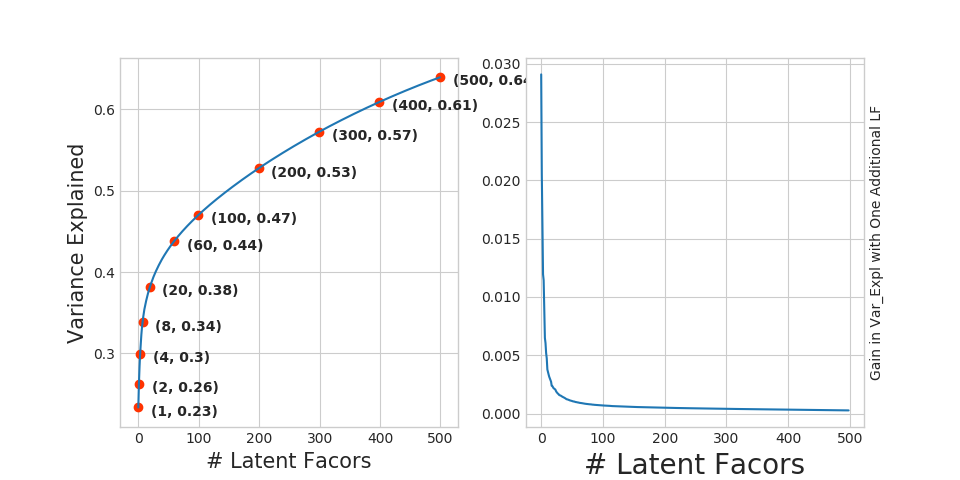

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))

ax1.set_ylabel("Variance Explained", fontsize=15)
ax1.set_xlabel("# Latent Facors", fontsize=15)
ax1.plot(expl_var)
# annote some (latentfactors, expl_var) to make it clear
ind = [1, 2,4,8,20, 60, 100, 200, 300, 400, 500]
ax1.scatter(x = [i-1 for i in ind], y = expl_var[[i-1 for i in ind]], c='#ff3300')
for i in ind:
    ax1.annotate(s ="({}, {})".format(i,  np.round(expl_var[i-1], 2)), xy=(i-1, expl_var[i-1]),
                xytext = ( i+20, expl_var[i-1] - 0.01), fontweight='bold')

change_in_expl_var = [expl_var[i+1] - expl_var[i] for i in range(len(expl_var)-1)]
ax2.plot(change_in_expl_var)



ax2.set_ylabel("Gain in Var_Expl with One Additional LF", fontsize=10)
ax2.yaxis.set_label_position("right")
ax2.set_xlabel("# Latent Facors", fontsize=20)

plt.show()

In [ ]:
for i in ind:
    print("({}, {})".format(i, np.round(expl_var[i-1], 2)))

(1, 0.23)
(2, 0.26)
(4, 0.3)
(8, 0.34)
(20, 0.38)
(60, 0.44)
(100, 0.47)
(200, 0.53)
(300, 0.57)
(400, 0.61)
(500, 0.64)


 
> I think 500 dimensions is good enough 

---------

-  By just taking __(20 to 30)__ latent factors, explained variance that we could get is __20 %__. 

- To take it to __60%__, we have to take  __almost 400 latent factors__. It is not fare.



- It basically is the __gain of variance explained__, if we ___add one additional latent factor to it.___


- By adding one by one latent factore too it, the ___gain in expained variance__ with that addition is decreasing. (Obviously, because they are sorted that way).
- ___LHS Graph___:
    - __x__ --- ( No of latent factos ),
    - __y__ --- ( The variance explained by taking x latent factors)



- __More decrease in the line (RHS graph) __:
    - We  are getting more expained variance than before.
- __Less decrease in that line (RHS graph)__  :
    - We are not getting benifitted from adding latent factor furthur. This is what is shown in the plots.


- ___RHS Graph___:
    - __x__ --- ( No of latent factors ),
    - __y__ --- ( Gain n Expl_Var by taking one additional latent factor) 

In [ ]:
# Let's project our Original U_M matrix into into 500 Dimensional space...
start = datetime.now()
trunc_matrix = train_sparse_matrix.dot(netflix_svd.components_.T)
print(datetime.now()- start)

0:00:45.670265


In [ ]:
type(trunc_matrix), trunc_matrix.shape

(numpy.ndarray, (2649430, 500))

* Let's convert this to actual sparse matrix and store it for future purposes

In [ ]:
if not os.path.isfile('trunc_sparse_matrix.npz'):
    # create that sparse sparse matrix
    trunc_sparse_matrix = sparse.csr_matrix(trunc_matrix)
    # Save this truncated sparse matrix for later usage..
    sparse.save_npz('trunc_sparse_matrix', trunc_sparse_matrix)
else:
    trunc_sparse_matrix = sparse.load_npz('trunc_sparse_matrix.npz')

In [ ]:
trunc_sparse_matrix.shape

(2649430, 500)

Computing top 50 similarities for each user..
computing done for 10 users [  time elapsed : 0:02:09.746324  ]
computing done for 20 users [  time elapsed : 0:04:16.017768  ]
computing done for 30 users [  time elapsed : 0:06:20.861163  ]
computing done for 40 users [  time elapsed : 0:08:24.933316  ]
computing done for 50 users [  time elapsed : 0:10:28.861485  ]
Creating Sparse matrix from the computed similarities


<IPython.core.display.Javascript object>


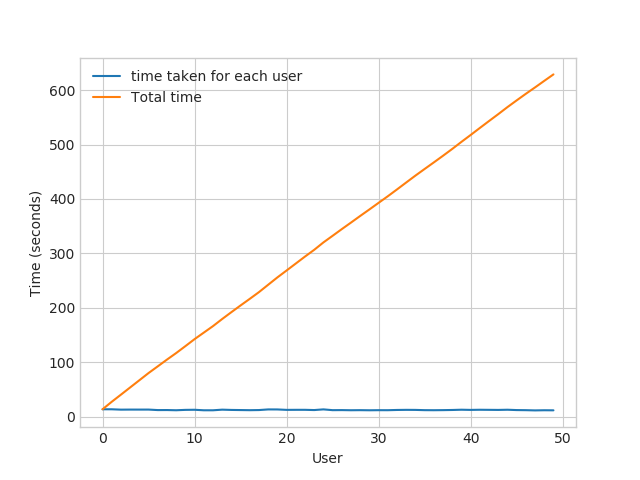

--------------------------------------------------
time: 0:10:52.658092


In [ ]:
start = datetime.now()
trunc_u_u_sim_matrix, _ = compute_user_similarity(trunc_sparse_matrix, compute_for_few=True, top=50, verbose=True, 
                                                 verb_for_n_rows=10)
print("-"*50)
print("time:",datetime.now()-start)

**: This is taking more time for each user than Original one.**

- from above plot, It took almost __12.18__ for computing simlilar users for __one user__
    
    
- We have __405041 users__ with us in training set.


- ${ 405041 \times 12.18 ==== 4933399.38 \sec } ====  82223.323 \min ==== 1370.388716667 \text{ hours}
==== 57.099529861 \text{ days}...$

    - Even we run on 4 cores parallelly (a typical system now a days), It will still take almost __(14 - 15) __ days.


- __Why did this happen...??__


    - Just think about it. It's not that difficult.

---------------------------------_( sparse & dense..................get it ?? )_-----------------------------------

__Is there any other way to compute user user similarity..??__

-An alternative is to compute similar users for a particular user,  whenenver required (**ie., Run time**)
    - We maintain a binary Vector for users, which tells us whether we already computed or not..
    - ***If not*** : 
        - Compute top (let's just say, 1000) most similar users for this given user, and add this to our datastructure, so that we can just access it(similar users) without recomputing it again.
        - 
    - ***If It is already Computed***:
        - Just get it directly from our datastructure, which has that information.
        - In production time, We might have to recompute similarities, if it is computed a long time ago. Because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ). 
        - 
    - ***Which datastructure to use:***
        - It is purely implementation dependant. 
        - One simple method is to maintain a **Dictionary Of Dictionaries**.
            - 
            - **key    :** _userid_ 
            - __value__: _Again a dictionary_
                - __key__  : _Similar User_
                - __value__: _Similarity Value_

### 6.3 Movie-Movie Similarity
- Just Transpose the train_sparse_matrix and sent it to the compute similarity function

In [ ]:
start = datetime.now()
if not os.path.isfile('/content/MyDrive/My Drive/Netflix_price/Copy of m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("/content/MyDrive/My Drive/Netflix_price/Copy of m_m_sim_sparse.npz")
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It is there, We will get it.
Done ...
It's a  (17771, 17771)  dimensional matrix
0:00:50.815718


In [ ]:
m_m_sim_sparse.shape

(17771, 17771)

- Even though we have similarity measure of each movie, with all other movies, We generally don't care much about least similar movies.


- Most of the times, only top_xxx similar items matters. It may be 10 or 100.


- We take only those top similar movie ratings and store them  in a saperate dictionary.

In [ ]:
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [ ]:
start_time = datetime.now()
similar_movies = dict()
for movie in movie_ids:
    #get the top similar movies and store them in a the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]   #[1:] used for ignoring the similarity of the same movie since the similiarity with same movie gives high similarity
    similar_movies[movie] = sim_movies[:100]
print(datetime.now() - start_time)

# just testing similar movies for movie_15
similar_movies[15]

0:00:31.023124


array([ 8279,  8013, 16528,  5927, 13105, 12049,  4424, 10193, 17590,
        4549,  3755,   590, 14059, 15144, 15054,  9584,  9071,  6349,
       16402,  3973,  1720,  5370, 16309,  9376,  6116,  4706,  2818,
         778, 15331,  1416, 12979, 17139, 17710,  5452,  2534,   164,
       15188,  8323,  2450, 16331,  9566, 15301, 13213, 14308, 15984,
       10597,  6426,  5500,  7068,  7328,  5720,  9802,   376, 13013,
        8003, 10199,  3338, 15390,  9688, 16455, 11730,  4513,   598,
       12762,  2187,   509,  5865,  9166, 17115, 16334,  1942,  7282,
       17584,  4376,  8988,  8873,  5921,  2716, 14679, 11947, 11981,
        4649,   565, 12954, 10788, 10220, 10963,  9427,  1690,  5107,
        7859,  5969,  1510,  2429,   847,  7845,  6410, 13931,  9840,
        3706])

#### 6.3.1 Finding most similar movies using similarity_matrix

In [ ]:
movie_titles = pd.read_csv("/content/MyDrive/My Drive/Netflix_price/Copy of movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")

movie_titles.head()

Tokenization took: 4.37 ms
Type conversion took: 26.57 ms
Parser memory cleanup took: 0.01 ms


,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


### 6.4 Similar movies for "Vampire Journals"

In [ ]:
mv_id = 67

print("\nMovie ----->",movie_titles.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} movies which are similarto this  and we will get only top most..".format(m_m_sim_sparse[:,mv_id].getnnz()))


Movie -----> Vampire Journals

It has 270 Ratings from users.

We have 17284 movies which are similarto this  and we will get only top most..


In [ ]:
similarities = m_m_sim_sparse[mv_id].toarray().ravel()
sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1) and return its indices(movie_ids)

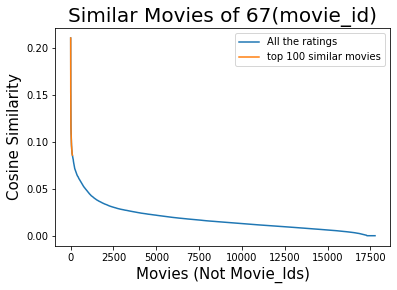

In [ ]:
plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

In [ ]:
#top 10 similar movies
movie_titles.loc[sim_indices[:10]]

,year_of_release,title
movie_id,,
323,1999.0,Modern Vampires
4044,1998.0,Subspecies 4: Bloodstorm
1688,1993.0,To Sleep With a Vampire
13962,2001.0,Dracula: The Dark Prince
12053,1993.0,Dracula Rising
16279,2002.0,Vampires: Los Muertos
4667,1996.0,Vampirella
1900,1997.0,Club Vampire
13873,2001.0,The Breed


## 7. Machine Learning Models

### 7.1 Creating a sample sparse matrix

In [ ]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose):
    """
        It will get it from the ''path'' if it is present  or It will create 
        and store the sampled sparse matrix in the path specified.
    """

    #get row, col and rating from sparse.find()
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)
    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds.. 
    #https://numpy.org/doc/stable/reference/generated/numpy.isin.html
    mask = np.logical_and(np.isin(row_ind, sample_users), np.isin(col_ind, sample_movies))
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape = (max(sample_users)+1, max(sample_movies)+1))
    
    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('saving it into disk')
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done..\n')
    
    return sample_sparse_matrix

#### 7.1.1 Sample Train data

In [ ]:
start = datetime.now()
path = "/content/MyDrive/My Drive/Netflix_price/Copy of sample_train_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else: 
    # get 10k users and 1k movies from available data 
    sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=10000, no_movies=1000,
                                             path = path)

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.039386


#### 7.1.2 Sample Test data

In [ ]:
start = datetime.now()

path = "/content/MyDrive/My Drive/Netflix_price/Copy of sample_test_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else:
    # get 5k users and 500 movies from available data 
    sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_matrix, no_users=5000, no_movies=500,
                                                 path = "sample/small/sample_test_sparse_matrix.npz")
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.043629


### 7.2 Preparing features for Sampled_data
1. Global avg of rating of movies and users
2. Avg rating of movies given by users
3. Avg rating of each user given on movies

In [ ]:
sample_train_averages = {}

#### 7.2.1 Global Avg in sample data

In [ ]:
global_avg = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_avg
sample_train_averages['global']

3.582981044592936

#### 7.2.2 Finding avg rating per user given on movies

In [ ]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)
def get_average_ratings(sparse_matrix, of_users):

    #avg rating of user
    ax = 1 if of_users else 0      # axis 1 - for user, axis 0 - movie

    #".A1" is used for converting column matrix to 1-D numpy array
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1

    #Boolean matrix (whether user rated or not)
    is_rated = sparse_matrix!=0

    #no of ratings that each user OR movie
    no_of_ratings = is_rated.sum(axis=ax).A1

    #max_user, max_movie ids in sparse_matrix
    u,m = sparse_matrix.shape

    #create a dictionary with key:user and values:avg_rating
    average_rating = {i: sum_of_ratings[i]/no_of_ratings[i] for i in range(u if of_users else m) if no_of_ratings[i]!=0}

    return average_rating

In [ ]:
sample_train_averages['user'] = get_average_ratings(sample_train_sparse_matrix, True)
print('\nAverage rating of user 1809 :',sample_train_averages['user'][1809])


Average rating of user 1809 : 3.888888888888889


#### 7.2.3 Avg rating of movies

In [ ]:
sample_train_averages['movie'] =  get_average_ratings(sample_train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 11998 :',sample_train_averages['movie'][11998])


 AVerage rating of movie 11998 : 3.625


#### 7.2.4 PDF and CDF of sample training data averages

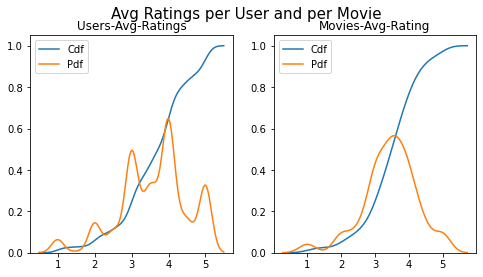

0:00:00.576233


In [ ]:
start = datetime.now()
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

ax1.set_title('Users-Avg-Ratings')
# get the list of average user ratings from the averages dictionary..
user_averages = [rat for rat in sample_train_averages['user'].values()]
sns.distplot(user_averages, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(user_averages, ax=ax1, hist=False,label='Pdf')

ax2.set_title('Movies-Avg-Rating')
# get the list of movie_average_ratings from the dictionary..
movie_averages = [rat for rat in sample_train_averages['movie'].values()]
sns.distplot(movie_averages, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(movie_averages, ax=ax2, hist=False, label='Pdf')

plt.show()
print(datetime.now() - start)

### 7.3 Featurizing data

In [ ]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(sample_test_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 129286


 No of ratings in Our Sampled test  matrix is : 7333



In [ ]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

############################################################
# It took me almost 10 hours to prepare this train dataset.#
############################################################
start = datetime.now()
if os.path.isfile('sample/small/reg_train.csv'):
    print("File already exists you don't have to prepare again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('sample/small/reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] #ignore the first user as its the similarity of the same user
            # get the ratings of most similar users for this movie
            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(sample_train_averages['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)

preparing 129286 tuples for the dataset..

Done for 10000 rows----- 0:53:13.974716
Done for 20000 rows----- 1:47:58.228942
Done for 30000 rows----- 2:42:46.963119
Done for 40000 rows----- 3:36:44.807894
Done for 50000 rows----- 4:28:55.311500
Done for 60000 rows----- 5:24:18.493104
Done for 70000 rows----- 6:17:39.669922
Done for 80000 rows----- 7:11:23.970879
Done for 90000 rows----- 8:05:33.787770
Done for 100000 rows----- 9:00:25.463562
Done for 110000 rows----- 9:51:28.530010
Done for 120000 rows----- 10:42:05.382141
11:30:13.699183


In [4]:
reg_train = pd.read_csv('/content/drive/My Drive/Netflix_price/Copy of reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3
2,99865,33,3.581679,5.0,5.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,4.0,3.714286,4.092437,5
3,101620,33,3.581679,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,5.0,3.584416,4.092437,5
4,112974,33,3.581679,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,3.750000,4.092437,5


-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 similar users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 similar movies rated by this movie.. )


- __UAvg__ : User's Average rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

In [10]:
reg_test = pd.read_csv('/content/drive/My Drive/Netflix_price/Copy of reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_test.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
2,1737912,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3
3,1849204,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
4,28572,111,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,1


### 7.4 Transforming data for surprise model

- We can't give raw data (movie, user, rating) to train the model in Surprise library.


- They have a saperate format for TRAIN and TEST data, which will be useful for training the models like SVD, KNNBaseLineOnly....etc..,in Surprise.


- We can form the trainset from a file, or from a Pandas  DataFrame. 
http://surprise.readthedocs.io/en/stable/getting_started.html#load-dom-dataframe-py 

In [6]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 327kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670910 sha256=c6bcd3daface2f30b565922f535f5d7f3565a582795bd7838b00678a9f4ed859
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [7]:
from surprise import Reader, Dataset

#### 7.4.1 Transforming train data

In [8]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(reg_train[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

#### 7.4.2 Transforming test data

- Testset is just a list of (user, movie, rating) tuples. (Order in the tuple is impotant) 

In [12]:
testset = list(zip(reg_test['user'].values, reg_test['movie'].values, reg_test['rating'].values))
testset[:3]

[(808635, 71, 5), (941866, 71, 4), (1737912, 71, 3)]

### 7.5 Applying ML model

-  Global dictionary that stores rmse and mape for all the models....

    - It stores the metrics in a dictionary of dictionaries

    > __keys__ : model names(string)

    > __value__: dict(__key__ : metric, __value__ : value ) 

In [13]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

#### 7.5.1 Utitlity function for regression model

In [14]:
# to get rmse and mape given actual and predicted ratings..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

###################################################################
###################################################################
def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    # fit the model
    print('Training the model..')
    start =datetime.now()
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return train_results, test_results

#### 7.5.2 Utility function for surprise model

In [29]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...
import random
my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)


##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])

    return actual, pred


################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print=True):
    actual, pred = get_ratings(predictions)
    rmse = np.sqrt((np.mean(pred-actual)**2))
    mape = np.mean((np.abs(pred-actual))/actual)

    return rmse, mape

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))

    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings

    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test


#### 7.5.3 XGBoost with 13 features

In [23]:
import xgboost as  xgb

Training the model..
[17:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done. Time taken : 0:00:05.195448

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.076373581778953
MAPE :  34.48223172520999


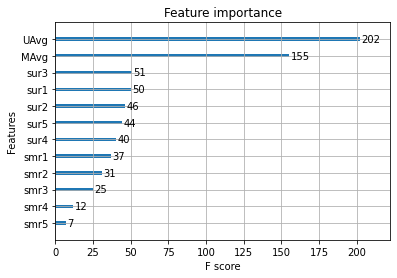

In [24]:
# prepare Train data
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test.drop(['user','movie','rating'], axis=1)
y_test = reg_test['rating']

# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=0, n_estimators=100)
train_results, test_results = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

#### 7.5.4 Surprise Model

In [25]:
from surprise import BaselineOnly

__Predicted_rating : ( baseline prediction ) __

    -  http://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly 
 >$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $


- $\pmb \mu $ : Average of all trainings in training data.
- $\pmb b_u$ : User bias
- $\pmb b_i$ : Item bias (movie biases) 

__Optimization function ( Least Squares Problem ) __

    - http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baselines-estimates-configuration 

> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$ 

In [30]:
# options are to specify.., how to compute those user and item biases
bsl_options = {
                'method':'sgd',
                'learning_rate': 0.001
               }

bsl_algo = BaselineOnly(bsl_options=bsl_options)

# run this algorithm.., It will return the train and test results..
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:00.401426 

Evaluating the model with train data..
time taken : 0:00:00.782136
---------------
Train Data
---------------
RMSE : 0.004502745978833403

MAPE : 0.2938957265235818

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.054596
---------------
Test Data
---------------
RMSE : 0.0043779762646614095

MAPE : 0.3504995544572911

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:01.239780


#### 7.5.5 XGBoost with initial 13 features + surprise baseline predictor

In [31]:
#updating training data with 14th feature
reg_train['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.898982
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.371403


In [32]:
#updating test data with 14th feature
reg_test['bslpr'] = models_evaluation_test['bsl_algo']['predictions']
reg_test.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.581679


Training the model..
[17:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done. Time taken : 0:00:05.831411

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0765603714651855
MAPE :  34.4648051883444


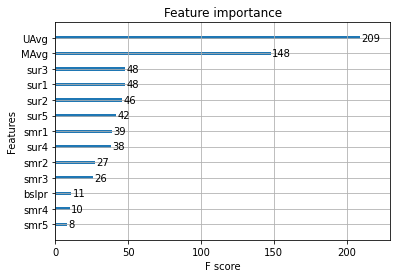

In [34]:
# prepare train data
x_train = reg_train.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test.drop(['user','movie','rating'], axis=1)
y_test = reg_test['rating']

# initialize Our first XGBoost model...
xgb_bsl = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results, test_results = run_xgboost(xgb_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

xgb.plot_importance(xgb_bsl)
plt.show()


#### 7.5.6 Surprise KNNBaseline Predictor

In [35]:
from surprise import KNNBaseline

- KNN BASELINE
    - http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline 

- PEARSON_BASELINE SIMILARITY
    - http://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline 

- SHRINKAGE
    - _2.2 Neighborhood Models_ in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf 

- __predicted Rating__ : ( ___ based on User-User similarity ___ )

\begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} \end{align}

- $\pmb{b_{ui}}$ -  _Baseline prediction_ of (user,movie) rating

- $ \pmb {N_i^k (u)}$ - Set of __K similar__ users (neighbours) of __user (u)__ who rated __movie(i)__  

- _sim (u, v)_ - __Similarity__ between users __u and v__  
    - Generally, it will be cosine similarity or Pearson correlation coefficient. 
    - But we use __shrunk Pearson-baseline correlation coefficient__, which is based on the pearsonBaseline similarity ( we take base line predictions instead of mean rating of user/item)
       

- __ Predicted rating __ ( based on Item Item similarity ):
 \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} \end{align}

    -  ___Notations follows same as above (user user based predicted rating ) ___

#### 7.5.6.1 KNNBaseline model for user user similarities

In [36]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 

# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 

knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:27.594414 

Evaluating the model with train data..
time taken : 0:01:25.528096
---------------
Train Data
---------------
RMSE : 0.0158031448424127

MAPE : 0.09145093375416348

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.056861
---------------
Test Data
---------------
RMSE : 0.004953904626495088

MAPE : 0.3502094499698424

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:01:53.180381


#### 7.5.6.2 KNNBaseline Model for movie-movie similarity

In [37]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : Fals => this considers the similarities of movies instead of users

sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}


knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results 
models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_results

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:00.640237 

Evaluating the model with train data..
time taken : 0:00:07.726901
---------------
Train Data
---------------
RMSE : 0.0034751377312201457

MAPE : 0.08447062581998374

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.055461
---------------
Test Data
---------------
RMSE : 0.00507186864277847

MAPE : 0.3502269653015042

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:08.423824


### 7.5.7 XGBOOST with intial 13 features + Surprise Baseline Predictor + KNNBaseline Predictor

- - - First we will run XGBoost with predictions from both KNN's ( that uses User\_User and Item\_Item similarities along with our previous features.

 
- - - Then we will run XGBoost with just predictions form both knn models and preditions from our baseline model. 

In [38]:
# add the predicted values from both knns to this dataframe
reg_train['knn_bsl_u'] = models_evaluation_train['knn_bsl_u']['predictions']
reg_train['knn_bsl_m'] = models_evaluation_train['knn_bsl_m']['predictions']

reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.898982,3.93002,3.867958
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.371403,3.17733,3.076302


In [39]:
reg_test['knn_bsl_u'] = models_evaluation_test['knn_bsl_u']['predictions']
reg_test['knn_bsl_m'] = models_evaluation_test['knn_bsl_m']['predictions']

reg_test.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.581679,3.581679,3.581679


Training the model..
[17:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done. Time taken : 0:00:07.057118

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0767793575625662
MAPE :  34.44745951378593


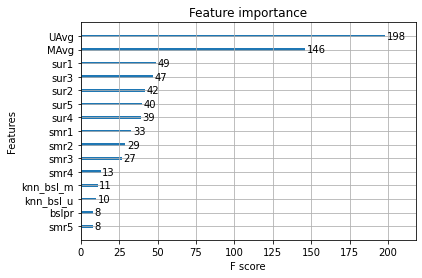

In [42]:
# prepare the train data....
x_train = reg_train.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train['rating']

# prepare the train data....
x_test = reg_test.drop(['user','movie','rating'], axis=1)
y_test = reg_test['rating']

# declare the model
xgb_knn_bsl = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results


xgb.plot_importance(xgb_knn_bsl)
plt.show()

### 7.5.8 Matrix Factorization
- SVD factorization
- SVD factorization with implicit feedback

#### 7.5.8.1 SVD Factorisation (USER MOVIE) interactions

http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD 

- __ Predicted Rating : __
    - 
    - $ \large  \hat r_{ui} = \mu + b_u + b_i + q_i^Tp_u $
    
        - $\pmb q_i$ - Representation of item(movie) in latent factor space
        
        - $\pmb p_u$ - Representation of user in new latent factor space
        


- A BASIC MATRIX FACTORIZATION MODEL in  https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $\large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right) $

In [45]:
from surprise import SVD

In [46]:
# initiallize the model
svd = SVD(n_factors=100, biased=True, random_state=0, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:06.758516 

Evaluating the model with train data..
time taken : 0:00:01.134674
---------------
Train Data
---------------
RMSE : 0.003605701584823678

MAPE : 0.1964581776859304

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.052564
---------------
Test Data
---------------
RMSE : 0.005040939858074976

MAPE : 0.3502335069986392

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:07.946945


#### 7.5.8.2 SVD matrix factorisation with implicit feedback from user (user rated movies)

- ----->  2.5 Implicit Feedback in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf

- __ Predicted Rating : __
    - 
    - $ \large \hat{r}_{ui} = \mu + b_u + b_i + q_i^T\left(p_u +
    |I_u|^{-\frac{1}{2}} \sum_{j \in I_u}y_j\right) $ 

 - $ \pmb{I_u}$ --- the set of all items rated by user u

- $\pmb{y_j}$ --- Our new set of item factors that capture implicit ratings.  

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2 + ||y_j||^2\right) $ 

In [43]:
from surprise import SVDpp

In [44]:
svdpp = SVDpp(n_factors=50, random_state=0, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results

Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. time taken : 0:01:43.166967 

Evaluating the model with train data..
time taken : 0:00:06.232952
---------------
Train Data
---------------
RMSE : 0.0019410417335639358

MAPE : 0.17552729297532713

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.059103
---------------
Test Data
---------------
RMSE : 0.004414954908390576

MAPE : 0.350212392732788

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:01:49.460395


### 7.6 XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques 

In [47]:
# add the predicted values from both knns to this dataframe
reg_train['svd'] = models_evaluation_train['svd']['predictions']
reg_train['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,53406,33,3.581679,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.370370,4.092437,4,3.898982,3.93002,3.867958,3.768936,4.089406
1,99540,33,3.581679,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,5.0,3.555556,4.092437,3,3.371403,3.17733,3.076302,3.303064,3.304682


In [48]:
reg_test['svd'] = models_evaluation_test['svd']['predictions']
reg_test['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.581679,3.581679,3.581679,3.581679,3.581679
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.581679,3.581679,3.581679,3.581679,3.581679


Training the model..
[18:34:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done. Time taken : 0:00:08.354288

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0767009530736358
MAPE :  34.45421822770432


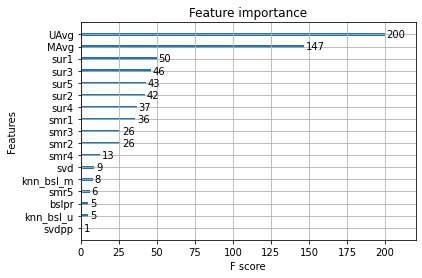

In [50]:
# prepare x_train and y_train
x_train = reg_train.drop(['user', 'movie', 'rating',], axis=1)
y_train = reg_train['rating']

# prepare test data
x_test = reg_test.drop(['user', 'movie', 'rating'], axis=1)
y_test = reg_test['rating']



xgb_final = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results


xgb.plot_importance(xgb_final)
plt.show()

### 7.7 XGboost with only surprise baseline, KNNBaseline, MF techniques

Training the model..
[18:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done. Time taken : 0:00:04.909158

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0753173927595403
MAPE :  35.07394764595582


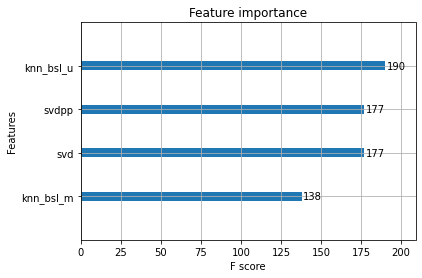

In [52]:
# prepare train data
x_train = reg_train[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train['rating']

# test data
x_test = reg_test[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test['rating']


xgb_all_models = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

xgb.plot_importance(xgb_all_models)
plt.show()

### 7.8 Comparison of all models

In [53]:
models = pd.read_csv('/content/drive/My Drive/Netflix_price/Copy of small_sample_results.csv', index_col=0)
models.loc['rmse'].sort_values()

svd               1.0726046873826458
knn_bsl_u         1.0726493739667242
knn_bsl_m          1.072758832653683
svdpp             1.0728491944183447
bsl_algo          1.0730330260516174
xgb_knn_bsl_mu    1.0753229281412784
xgb_all_models     1.075480663561971
first_algo        1.0761851474385373
xgb_bsl           1.0763419061709816
xgb_final         1.0763580984894978
xgb_knn_bsl       1.0763602465199797
Name: rmse, dtype: object

# **8. Assignment**
- Sample with 25k users and 3k movies (but we will do with 12k users and 1.2k movies because of computation
- Hyperparameter tuning of XGBoost of all models :
- XGBoost with 13 features
- Surprise Baseline model
- XGBoost with 13 features + Surprise Baseline model
- Surprise KNNBaseline predictor (user-user, movie-movie)
- XGBoost with 13 features + Surprises Baseline model + KNN Baseline Predictor
- SVD Matrix Factorisation (user-movie interactions, SVD implicit feedback)
- XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques 
- XgBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques


### Note:
- Since the time taking on no_users=25000 and movies=3000 taking too much and as per the aaic instructors we need to run the assignment on the model with users>10000 and movies>1000. I created a sample matrix using users=12000 and movies=1200

### 8.1 Sample sparse matrix for assignment

In [ ]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose):
    """
        It will get it from the ''path'' if it is present  or It will create 
        and store the sampled sparse matrix in the path specified.
    """

    #get row, col and rating from sparse.find()
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)
    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds.. 
    #https://numpy.org/doc/stable/reference/generated/numpy.isin.html
    mask = np.logical_and(np.isin(row_ind, sample_users), np.isin(col_ind, sample_movies))
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape = (max(sample_users)+1, max(sample_movies)+1))
    
    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('saving it into disk')
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done..\n')
    
    return sample_sparse_matrix

In [ ]:
from datetime import datetime
import numpy as np
from scipy import sparse
import os

train_sparse_matrix = sparse.load_npz('Copy of train_sparse_matrix.npz')

start = datetime.now()
path = "/home/kpkumar135/Netflix/assign_train_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    assign_train_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else: 
    # get 10k users and 1k movies from available data 
    assign_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=12000, no_movies=1200,
                                             path = path, verbose=True)

print(datetime.now() - start)

Original Matrix : (users, movies) -- (405041 17424)
Original Matrix : Ratings -- 80384405

Sampled Matrix : (users, movies) -- (12000 1200)
Sampled Matrix : Ratings -- 177717
saving it into disk
Done..

0:00:56.852628


### 8.2 Finding global average

In [ ]:
assign_train_averages = {}

In [ ]:
global_avg = assign_train_sparse_matrix.sum()/assign_train_sparse_matrix.count_nonzero()
assign_train_averages['global'] = global_avg
assign_train_averages['global']

3.5506507537264302

### 8.3 Finding average rating of user and movies

In [ ]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)
def get_average_ratings(sparse_matrix, of_users):

    #avg rating of user
    ax = 1 if of_users else 0      # axis 1 - for user, axis 0 - movie

    #".A1" is used for converting column matrix to 1-D numpy array
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1

    #Boolean matrix (whether user rated or not)
    is_rated = sparse_matrix!=0

    #no of ratings that each user OR movie
    no_of_ratings = is_rated.sum(axis=ax).A1

    #max_user, max_movie ids in sparse_matrix
    u,m = sparse_matrix.shape

    #create a dictionary with key:user and values:avg_rating
    average_rating = {i: sum_of_ratings[i]/no_of_ratings[i] for i in range(u if of_users else m) if no_of_ratings[i]!=0}

    return average_rating

In [ ]:
assign_train_averages['user'] = get_average_ratings(assign_train_sparse_matrix, True)

In [ ]:
assign_train_averages['user'][1374]

3.8333333333333335

In [ ]:
assign_train_averages['movie'] =  get_average_ratings(assign_train_sparse_matrix, of_users=False)

### 8.4 Finding the similarity for 12000 users and 1200 movies

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# get users, movies and ratings from our samples train sparse matrix
assign_train_users, assign_train_movies, assign_train_ratings = sparse.find(assign_train_sparse_matrix)

############################################################
# It took me almost 10 hours to prepare this train dataset.#
############################################################
start = datetime.now()
if os.path.isfile('reg_train.csv'):
    print("File already exists you don't have to prepare again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(assign_train_ratings)))
    with open('/home/kpkumar135/Netflix/assign_reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating)  in zip(assign_train_users, assign_train_movies, assign_train_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(assign_train_sparse_matrix[user], assign_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] #ignore the first user as its the similarity of the same user
            # get the ratings of most similar users for this movie
            top_ratings = assign_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([assign_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(assign_train_sparse_matrix[:,movie].T, assign_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = assign_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([assign_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(assign_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(assign_train_averages['user'][user])
            # Avg_movie rating
            row.append(assign_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)

preparing 177717 tuples for the dataset..

Done for 10000 rows----- 0:33:49.629505
Done for 20000 rows----- 1:07:32.137708
Done for 30000 rows----- 1:41:18.812546
Done for 40000 rows----- 2:15:07.131202
Done for 50000 rows----- 2:48:56.481040
Done for 60000 rows----- 3:22:45.755639


### Note:
- The above code ran for 177717. It shows only for 60000 bcoz it runs in gcp, and my system switched off due to power cut but it ran in the cloud, so the assign_data_matrix which i am using for the assignment is formed by 12000 users and 1200 movies

In [54]:
pd.read_csv('/content/drive/My Drive/Netflix_price/assign_reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,53406,33,3.550651,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.366667,4.172414,4
1,67390,33,3.550651,1.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,2.0,3.769231,4.172414,4
2,99540,33,3.550651,4.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,4.0,3.300000,4.172414,3
3,99865,33,3.550651,5.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,3.639344,4.172414,5
4,101620,33,3.550651,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,5.0,5.0,3.571429,4.172414,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177712,2241247,17740,3.550651,4.0,3.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,3.775281,3.489362,4
177713,2254991,17740,3.550651,4.0,4.0,4.0,5.0,2.0,3.0,3.0,3.0,4.0,3.0,2.693182,3.489362,4
177714,2276431,17740,3.550651,5.0,4.0,5.0,5.0,2.0,3.0,3.0,2.0,3.0,4.0,3.000000,3.489362,4
177715,2310525,17740,3.550651,1.0,2.0,4.0,2.0,3.0,3.0,5.0,3.0,3.0,4.0,3.300000,3.489362,1


## Note:
- From this we can see that the number of rows is 177717 which is exactly equals to 177717 tuples which shows that our matrix fully formed

### 8.5 Machine Learning Models on assignment data

In [83]:
assign_models_evaluation_train = dict()
assign_models_evaluation_test = dict()

assign_models_evaluation_train, assign_models_evaluation_test

({}, {})

#### 8.5.1 Utility function for XGBoost model

In [55]:
# to get rmse and mape given actual and predicted ratings..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

###################################################################
###################################################################
def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    # fit the model
    print('Training the model..')
    start =datetime.now()
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return train_results, test_results

#### 8.5.2 Utility function for Surprise model

In [56]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test

#### 8.5.3 Transforming the data for surprise model

In [79]:
assign_train = pd.read_csv('/content/drive/My Drive/Netflix_price/assign_reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
assign_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,53406,33,3.550651,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.366667,4.172414,4
1,67390,33,3.550651,1.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,2.0,3.769231,4.172414,4
2,99540,33,3.550651,4.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,4.0,3.300000,4.172414,3
3,99865,33,3.550651,5.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,3.639344,4.172414,5
4,101620,33,3.550651,2.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,5.0,5.0,3.571429,4.172414,5


In [80]:
assign_test = pd.read_csv('/content/drive/My Drive/Netflix_price/Copy of reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
assign_test.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
2,1737912,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3
3,1849204,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
4,28572,111,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,1


In [81]:
from surprise import Reader, Dataset
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(assign_train[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

In [82]:
testset = list(zip(assign_test['user'].values, assign_test['movie'].values, assign_test['rating'].values))
testset[:3]

[(808635, 71, 5), (941866, 71, 4), (1737912, 71, 3)]

### 8.6 XGBoost with 13 features

In [ ]:
# prepare Train data
x_train = assign_train.drop(['user','movie','rating'], axis=1)
y_train = assign_train['rating']

# Prepare Test data
x_test = assign_test.drop(['user','movie','rating'], axis=1)
y_test = assign_test['rating']

#### 8.6.1 Hyperparameter tuning of XGBoost with 13 features

In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import  RandomizedSearchCV

xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)


parameters_XGB={
                'n_estimators':[100,250,500],
                'learning_rate':[0.1,0.3,0.5],
                'max_depth':[4,5,6],
                'min_child_weight':[3,4,5]
                }

random_search_cv = RandomizedSearchCV(estimator=xgb_reg, param_distributions=parameters_XGB, cv=2, n_jobs=-1)

[18:58:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [68]:
random_search_cv = random_search_cv.fit(x_train, y_train)

[19:04:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [69]:
random_search_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 100}

### 8.6.2 Modelled with best hyperparameter

Training the model..
[19:14:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done. Time taken : 0:00:11.851957

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.07508086950418
MAPE :  34.602680352770356


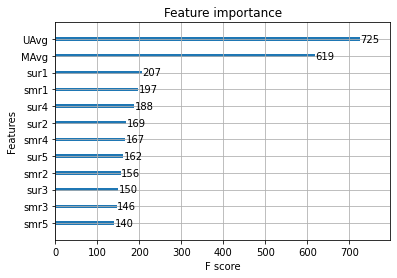

In [84]:

# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, 
                             n_estimators=100 , learning_rate=0.1 , max_depth=5 , min_child_weight= 3)
train_results, test_results = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
assign_models_evaluation_train['first_algo'] = train_results
assign_models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

### 8.7 Baseline Surprise model

In [71]:
from surprise import BaselineOnly 

In [86]:

# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)


# Just store these error metrics in our models_evaluation datastructure
assign_models_evaluation_train['bsl_algo'] = bsl_train_results 
assign_models_evaluation_test['bsl_algo'] = bsl_test_results

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:00.664613 

Evaluating the model with train data..
time taken : 0:00:01.251692
---------------
Train Data
---------------
RMSE : 0.9339601465792874

MAPE : 29.580527712788847

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.049324
---------------
Test Data
---------------
RMSE : 1.0707027263288096

MAPE : 34.34250071935359

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:01.967333


### 8.8 XGBoost with 13 features + Surprise Baseline model

In [88]:
assign_train['bslpr'] = assign_models_evaluation_train['bsl_algo']['predictions']
assign_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,53406,33,3.550651,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.366667,4.172414,4,3.994938
1,67390,33,3.550651,1.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,2.0,3.769231,4.172414,4,3.281518


In [89]:
assign_test['bslpr'] = assign_models_evaluation_test['bsl_algo']['predictions']
assign_test.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.550651
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.550651


#### 8.8.1 Hyperparameter tuning

In [90]:
# prepare Train data
x_train = assign_train.drop(['user','movie','rating'], axis=1)
y_train = assign_train['rating']

# Prepare Test data
x_test = assign_test.drop(['user','movie','rating'], axis=1)
y_test = assign_test['rating']

In [91]:
from xgboost import XGBRegressor
from sklearn.model_selection import  RandomizedSearchCV

xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)


parameters_XGB={
                'n_estimators':[100,250,500],
                'learning_rate':[0.1,0.3,0.5],
                'max_depth':[4,5,6],
                'min_child_weight':[3,4,5]
                }

random_search_cv = RandomizedSearchCV(estimator=xgb_reg, param_distributions=parameters_XGB, cv=2, n_jobs=-1)

[19:18:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [92]:
random_search_cv = random_search_cv.fit(x_train, y_train)

[19:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
random_search_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 100}

#### 8.8.2 Modelling with best hyperparameter

Training the model..
[19:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done. Time taken : 0:00:16.682347

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0950858533194785
MAPE :  33.57996028631111


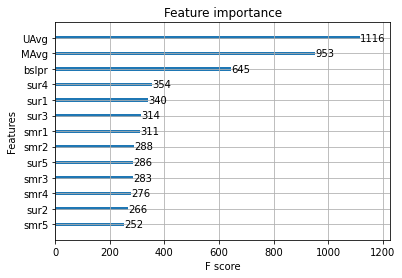

In [94]:
# initialize Our first XGBoost model...
xgb_bsl = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators= 100,
                           learning_rate= 0.1, max_depth= 6, min_child_weight=3 )
train_results, test_results = run_xgboost(xgb_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
assign_models_evaluation_train['xgb_bsl'] = train_results
assign_models_evaluation_test['xgb_bsl'] = test_results

xgb.plot_importance(xgb_bsl)
plt.show()


### 8.9 Surprise KNNBaseline Predictor
- User user similarities
- movie movie similarities

#### 8.9.1 Surprise KNNBaseline with user user similarities

In [96]:
from surprise import KNNBaseline

# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 

knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
assign_models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
assign_models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:43.179314 

Evaluating the model with train data..
time taken : 0:02:17.589783
---------------
Train Data
---------------
RMSE : 0.35594237282596297

MAPE : 9.825864233671071

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.065691
---------------
Test Data
---------------
RMSE : 1.0701044020265693

MAPE : 34.40203734268945

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:03:00.835656


#### 8.9.2 Surprise KNNBaseline with Movie Movie similarities

In [98]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : Fals => this considers the similarities of movies instead of users

sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}


knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
assign_models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results 
assign_models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_results

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:00.984090 

Evaluating the model with train data..
time taken : 0:00:11.892351
---------------
Train Data
---------------
RMSE : 0.3592155923736147

MAPE : 9.54501751396511

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.053780
---------------
Test Data
---------------
RMSE : 1.070122500694343

MAPE : 34.405292864279886

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:12.931953


### 8.10 XGBoost with 13 features + Surprises Baseline model + KNN Baseline Predictor

In [105]:
# add the predicted values from both knns to this dataframe
assign_train['knn_bsl_u'] = assign_models_evaluation_train['knn_bsl_u']['predictions']
assign_train['knn_bsl_m'] = assign_models_evaluation_train['knn_bsl_m']['predictions']

assign_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,53406,33,3.550651,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.366667,4.172414,4,3.994938,3.981651,3.914997
1,67390,33,3.550651,1.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,2.0,3.769231,4.172414,4,3.281518,3.078194,3.051035


In [106]:
# add the predicted values from both knns to this dataframe
assign_test['knn_bsl_u'] = assign_models_evaluation_test['knn_bsl_u']['predictions']
assign_test['knn_bsl_m'] = assign_models_evaluation_test['knn_bsl_m']['predictions']

assign_test.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.550651,3.550651,3.550651
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.550651,3.550651,3.550651


#### 8.10.1 Hyperparameter tuning

In [107]:
# prepare the train data....
x_train = assign_train.drop(['user', 'movie', 'rating'], axis=1)
y_train = assign_train['rating']

# prepare the train data....
x_test = assign_test.drop(['user','movie','rating'], axis=1)
y_test = assign_test['rating']

In [108]:
from xgboost import XGBRegressor
from sklearn.model_selection import  RandomizedSearchCV

xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)


parameters_XGB={
                'n_estimators':[100,250,500],
                'learning_rate':[0.1,0.3,0.5],
                'max_depth':[4,5,6],
                'min_child_weight':[3,4,5]
                }

random_search_cv = RandomizedSearchCV(estimator=xgb_reg, param_distributions=parameters_XGB, cv=2, n_jobs=-1)

[19:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [109]:
random_search_cv = random_search_cv.fit(x_train, y_train)

[19:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [110]:
random_search_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 100}

#### 8.10.2 Modelling with best hyperparamter

Training the model..
[19:42:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done. Time taken : 0:00:17.820724

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.075029457603764
MAPE :  34.61883533964959


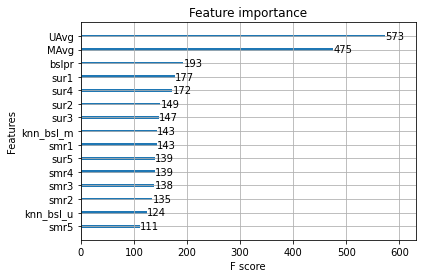

In [111]:
# declare the model
xgb_knn_bsl = xgb.XGBRegressor(n_jobs=-1, random_state=0, learning_rate= 0.1 ,n_estimators= 100,
                               max_depth= 5, min_child_weight= 5)
train_results, test_results = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
assign_models_evaluation_train['xgb_knn_bsl'] = train_results
assign_models_evaluation_test['xgb_knn_bsl'] = test_results


xgb.plot_importance(xgb_knn_bsl)
plt.show()

### 8.11 Matrix Factorization:
- SVD Matrix Factorization user movie interactions
- SVD Matrix Factorization implicit feedback

#### 8.11.1 SVD Matrix Factorization User Movie Interactions

In [113]:
from surprise import SVD

# initiallize the model
svd = SVD(n_factors=100, biased=True, random_state=0, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
assign_models_evaluation_train['svd'] = svd_train_results 
assign_models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:08.746317 

Evaluating the model with train data..
time taken : 0:00:01.507279
---------------
Train Data
---------------
RMSE : 0.6588520545653487

MAPE : 19.923644355504923

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.057815
---------------
Test Data
---------------
RMSE : 1.0703322397969943

MAPE : 34.311632795068284

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:10.311969


#### 8.11.2 SVD Matrix Factorization with implicit feedback

In [117]:
from surprise import SVDpp

# initiallize the model
svdpp = SVDpp(n_factors=50, random_state=0, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
assign_models_evaluation_train['svdpp'] = svdpp_train_results 
assign_models_evaluation_test['svdpp'] = svdpp_test_results

Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. time taken : 0:02:44.833323 

Evaluating the model with train data..
time taken : 0:00:09.294915
---------------
Train Data
---------------
RMSE : 0.6099084678008967

MAPE : 17.859482529671734

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.052364
---------------
Test Data
---------------
RMSE : 1.0707127148618087

MAPE : 34.17672211919334

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:02:54.182205


### 8.12 XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques 

In [119]:
# add the predicted values from both knns to this dataframe
assign_train['svd'] = assign_models_evaluation_train['svd']['predictions']
assign_train['svdpp'] = assign_models_evaluation_train['svdpp']['predictions']

assign_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,53406,33,3.550651,4.0,5.0,5.0,4.0,1.0,5.0,2.0,5.0,3.0,1.0,3.366667,4.172414,4,3.994938,3.981651,3.914997,3.951128,3.590953
1,67390,33,3.550651,1.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,2.0,3.769231,4.172414,4,3.281518,3.078194,3.051035,3.006791,3.341052


In [121]:
assign_test['svd'] = assign_models_evaluation_test['svd']['predictions']
assign_test['svdpp'] = assign_models_evaluation_test['svdpp']['predictions']

assign_test.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.550651,3.550651,3.550651,3.550651,3.550651
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.550651,3.550651,3.550651,3.550651,3.550651


#### 8.12.1 Hyperparamter Tuning

In [122]:
# prepare x_train and y_train
x_train = assign_train.drop(['user', 'movie', 'rating',], axis=1)
y_train = assign_train['rating']

# prepare test data
x_test = assign_test.drop(['user', 'movie', 'rating'], axis=1)
y_test = assign_test['rating']

In [123]:
from xgboost import XGBRegressor
from sklearn.model_selection import  RandomizedSearchCV

xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)


parameters_XGB={
                'n_estimators':[100,250,500],
                'learning_rate':[0.1,0.3,0.5],
                'max_depth':[4,5,6],
                'min_child_weight':[3,4,5]
                }

random_search_cv = RandomizedSearchCV(estimator=xgb_reg, param_distributions=parameters_XGB, cv=2, n_jobs=-1)

[19:50:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [124]:
random_search_cv = random_search_cv.fit(x_train, y_train)

[20:00:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [125]:
random_search_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 500}

#### 8.12.2 Modelling using best hyperparameter

Training the model..
[20:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done. Time taken : 0:01:10.569460

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0725967523426692
MAPE :  35.08647051089037


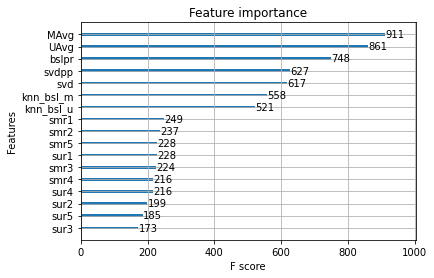

In [126]:
xgb_final = xgb.XGBRegressor(n_jobs=10, random_state=0, learning_rate=0.1 , n_estimators= 500,
                             max_depth= 4,min_child_weight= 5)
train_results, test_results = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
assign_models_evaluation_train['xgb_final'] = train_results
assign_models_evaluation_test['xgb_final'] = test_results


xgb.plot_importance(xgb_final)
plt.show()

### 8.13 XgBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques

In [129]:
# prepare train data
x_train = assign_train[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = assign_train['rating']

# test data
x_test = assign_test[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = assign_test['rating']

#### 8.13.1 Hyperparameter tuning

In [130]:
from xgboost import XGBRegressor
from sklearn.model_selection import  RandomizedSearchCV

xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)


parameters_XGB={
                'n_estimators':[100,250,500],
                'learning_rate':[0.1,0.3,0.5],
                'max_depth':[4,5,6],
                'min_child_weight':[3,4,5]
                }

random_search_cv = RandomizedSearchCV(estimator=xgb_reg, param_distributions=parameters_XGB, cv=2, n_jobs=-1)

[20:03:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [131]:
random_search_cv = random_search_cv.fit(x_train, y_train)

[20:08:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [132]:
random_search_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 100}

#### 8.13.2 Modelling with best hyperparameter

Training the model..
[20:09:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Done. Time taken : 0:00:10.047963

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0756036051901086
MAPE :  34.940067159028985


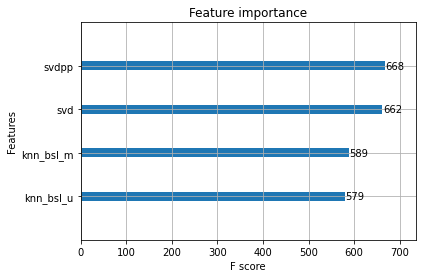

In [133]:
xgb_all_models = xgb.XGBRegressor(n_jobs=10, random_state=0, learning_rate=0.1 , n_estimators= 100,
                                  max_depth=5 , min_child_weight= 4)
train_results, test_results = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
assign_models_evaluation_train['xgb_all_models'] = train_results
assign_models_evaluation_test['xgb_all_models'] = test_results

xgb.plot_importance(xgb_all_models)
plt.show()

# 9. Summary

In [135]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(assign_models_evaluation_test).to_csv('/content/drive/My Drive/Netflix_price/assign_sample_results.csv')
models = pd.read_csv('/content/drive/My Drive/Netflix_price/assign_sample_results.csv', index_col=0)
models.loc['rmse'].sort_values()

knn_bsl_u         1.0701044020265693
knn_bsl_m          1.070122500694343
svd               1.0703322397969943
bsl_algo          1.0707027263288096
svdpp             1.0707127148618087
xgb_final         1.0725967523426692
xgb_knn_bsl        1.075029457603764
first_algo          1.07508086950418
xgb_all_models    1.0756036051901086
xgb_bsl           1.0950858533194785
Name: rmse, dtype: object

## Note:
- Out of all thee models 'knn_bsl_u' has the least rmse values of 1.070104

# **That's the End of the Code**